In [83]:
%matplotlib inline
from simulation import *
from scipy.special import comb

In [84]:
def findSet2(myG,myCenterNode,myMaxDeg):
    curSet = set()
    curDeg = myMaxDeg
    while(curDeg>0):
        tempoSet = set(findNeighDegN(myG,myCenterNode,curDeg))
        curSet = curSet.union(tempoSet)
        curDeg -= 1
    return curSet

Generating mGraph
----- DONE
Getting layout
----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [13, 41, 7, 23, 47] 


Slist :  [4]


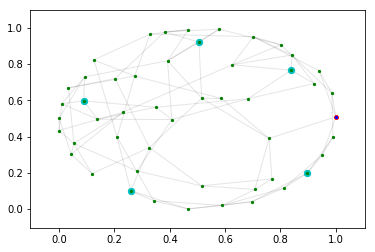

Starting infection


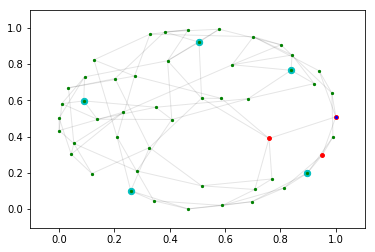

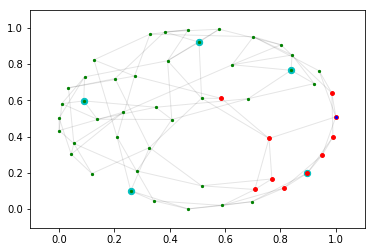

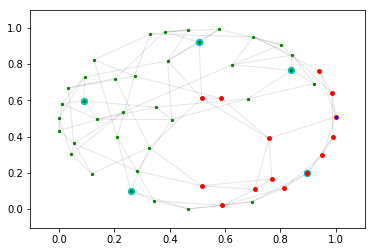

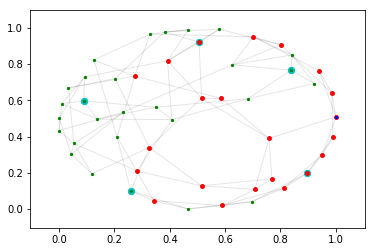

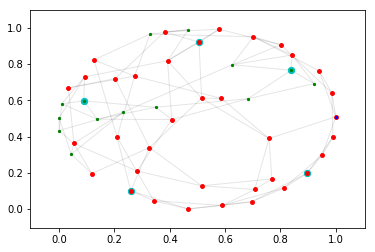

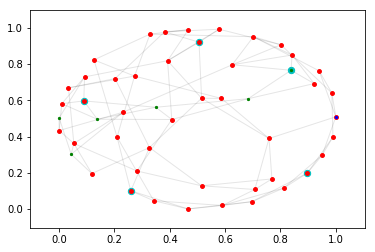

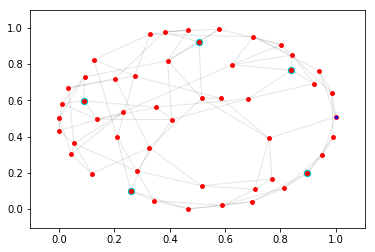

In [103]:
figureList = list()
# Parameters definition
numRumors = 1
maxThreshold = 1
numMonitors = 5
propagProba = 0.7
numNodes = 50
linkProba = 0.2
monitorTrigger = list()
numStep = 100


j=0

Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)

fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)
#fig1.savefig('./TestFigs/figT'+str(j)+'.png')

print("Starting infection")
infections = [[] for n in range(numRumors)]

infected = getInfectedList(Graph,numRumors)

while(not isAllInfected(Graph,numRumors)):

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)

    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)
    j += 1
    fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, myMonitors=monitorsList,myIndex=j)

In [104]:
sets = list()
monitorTrigger2 = sorted(monitorTrigger, key=lambda x : (x[0], x[2]))
for i in range(int(len(monitorTrigger2)/numRumors)):
    set1 =findSet(Graph,monitorTrigger2[i*numRumors][0],monitorTrigger2[i*numRumors][2])
    sets.append(set(set1))
    
source = set.intersection(*sets)

try:
    print("Identified Source = ",list(source)[0],"\nReal Source = ",rumorSources[0])
except:
    print("Real Source = ",rumorSources[0])
    print("No sources identified")
    printMonitorTrig(monitorTrigger)
    print('\n\nDifferent sets')
    print(*sets,sep='\n')

Real Source =  4
No sources identified

Monitoring Nodes :
Monitoring node number :  7 
	infected by rumor :  1 	at step :  2
Monitoring node number :  13 
	infected by rumor :  1 	at step :  5
Monitoring node number :  23 
	infected by rumor :  1 	at step :  4
Monitoring node number :  41 
	infected by rumor :  1 	at step :  6
Monitoring node number :  47 
	infected by rumor :  1 	at step :  7


Different sets
{11, 10, 3, 4}
{1, 2, 3, 40, 41, 42, 43, 45, 48, 49}
{2, 35, 36, 5, 38, 34, 6, 10, 11, 12, 46, 47, 48, 15, 14}
{2, 5, 6, 10, 11, 12, 14}
{11}


Real Source =  4
Detected Source =  [3, 4, 5, 6, 10, 11]


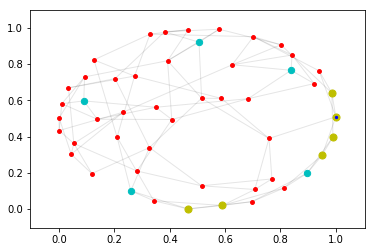

In [106]:
from networkUtils import drawColoredGraph2

setList = []


for i in monitorTrigger:
    nodeSet = findSet2(Graph,i[0],i[2])
    setList.append(nodeSet)
    
finalSet = set.intersection(*setList)
print("Real Source = ",rumorSources[0])
print("Detected Source = ",list(finalSet))
finalList = list(finalSet)


fig = drawColoredGraph2(Graph,Pos,numRumors,rumorSources,monitorsList,finalList)
#fig.savefig('./TestFigs/figEND'+'png')

In [107]:
degCent = nx.degree_centrality(Graph)

maxDeg = -1
maxNode = -1

for node in finalList :
    if degCent[node] > maxDeg :
        maxDeg = degCent[node]
        maxNode = node
    print(node,' : ',degCent[node])

print('\n Max degree Centrality : \n node ',maxNode,' : ', maxDeg)

3  :  0.08163265306122448
4  :  0.08163265306122448
5  :  0.061224489795918366
6  :  0.08163265306122448
10  :  0.1020408163265306
11  :  0.08163265306122448

 Max degree Centrality : 
 node  10  :  0.1020408163265306


In [111]:
print('Monitors : ',monitorsList,'\n\n')

pathList = list()

for source in finalList :
    print('\n source : ',source,': \n')
    for target in monitorsList :
        print(target,' : ',len(nx.shortest_path(Graph,source,target))-1)

Monitors :  [13, 41, 7, 23, 47] 



 source :  3 : 

13  :  5
41  :  5
7  :  2
23  :  3
47  :  3

 source :  4 : 

13  :  4
41  :  5
7  :  2
23  :  3
47  :  4

 source :  5 : 

13  :  4
41  :  6
7  :  1
23  :  4
47  :  4

 source :  6 : 

13  :  4
41  :  6
7  :  1
23  :  4
47  :  5

 source :  10 : 

13  :  2
41  :  6
7  :  2
23  :  4
47  :  6

 source :  11 : 

13  :  1
41  :  6
7  :  2
23  :  4
47  :  7


In [109]:
for i in range(int(len(monitorTrigger2)/numRumors)):
    print('Monitor node : ', monitorTrigger2[i*numRumors][0],' path : ',monitorTrigger2[i*numRumors][2])

Monitor node :  7  path :  2
Monitor node :  13  path :  5
Monitor node :  23  path :  4
Monitor node :  41  path :  6
Monitor node :  47  path :  7


In [82]:
comb(5,4,exact=True)

5